<a href="https://colab.research.google.com/github/tctamedie/EventManagement/blob/BDA/FraudDetectionCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
fraudTest = pd.read_csv('fraudTest.csv')
fraudTrain = pd.read_csv('fraudTrain.csv')

In [4]:
data= pd.concat([fraudTrain, fraudTest], ignore_index=True)

In [5]:
data.dropna(inplace=True)

In [6]:
import datetime
from calendar import monthrange
import dateutil.relativedelta

def birthday(date: str) -> float:
    """
    Calculates the age in years (with fractional months and days)
    based on the given birthday string in 'YYYY-MM-DD' format.
    """
    # Get the current UTC date
    now = datetime.datetime.utcnow().date()

    # Parse the input date
    birth_date = datetime.datetime.strptime(date, '%Y-%m-%d').date()

    # Calculate the difference
    age = dateutil.relativedelta.relativedelta(now, birth_date)

    # Get the number of days in the current month
    days_in_month = monthrange(now.year, now.month)[1]

    # Return precise age in years
    return age.years + age.months / 12 + age.days / (days_in_month * 12)


def getAge(date,now):
    age = dateutil.relativedelta.relativedelta(now, date)
    return age.years


In [7]:
def extract(date: str) -> tuple:
    """
    Extracts hour, minute from a datetime string.
    """
    dt = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    return dt.hour, dt.minute

In [8]:
'''
Extracting hour from the transaction date and time
to create new column to learn specific hit times
'''
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour

In [9]:
data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [10]:
from dateutil.relativedelta import relativedelta
now = datetime.datetime.utcnow().date()
data['dob'] = pd.to_datetime(data['dob'])
data['today'] = pd.to_datetime(now)
data['age'] = data['dob'].apply(lambda dob: relativedelta(now, dob).years)

In [11]:
data['age_group'] = pd.cut( data['age'],    bins=[-np.inf, 17, 25, 35, 45, 55, np.inf],
    labels=["0-17", "18-25", "26-35", "36-45", "46-55", "56+"],
)

In [12]:
data['amount_range'] = pd.qcut( data['amt'], 5,    labels=["Very low","low", "medium", "high", "very high"]
)

In [13]:
data['fraudulent'] = data['is_fraud'].map({0:'No', 1:'Yes'})

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   cc_num                 int64         
 3   merchant               object        
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    datetime64[ns]
 18  trans_num             

In [15]:
data.describe(include='object').transpose()

,count,unique,top,freq
merchant,1852394,693,fraud_Kilback LLC,6262
category,1852394,14,gas_transport,188029
first,1852394,355,Christopher,38112
last,1852394,486,Smith,40940
gender,1852394,2,F,1014749
street,1852394,999,908 Brooks Brook,4392
city,1852394,906,Birmingham,8040
state,1852394,51,TX,135269
job,1852394,497,Film/video editor,13898
trans_num,1852394,1852394,1765bb45b3aa3224b4cdcb6e7a96cee3,1


In [16]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,1852394.0,537193.44,0.0,231549.0,463098.0,833575.75,1296674.0,366910.960483
trans_date_trans_time,1852394,2020-01-20 21:31:46.801827328,2019-01-01 00:00:18,2019-07-23 04:13:43.750000128,2020-01-02 01:15:31,2020-07-23 12:11:25.249999872,2020-12-31 23:59:34,NaN
cc_num,1852394.0,417386038393710400.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0,1309115265318020352.0
amt,1852394.0,70.063567,1.0,9.64,47.45,83.1,28948.9,159.253975
zip,1852394.0,48813.258191,1257.0,26237.0,48174.0,72042.0,99921.0,26881.845966
lat,1852394.0,38.539311,20.0271,34.6689,39.3543,41.9404,66.6933,5.07147
long,1852394.0,-90.227832,-165.6723,-96.798,-87.4769,-80.158,-67.9503,13.747895
city_pop,1852394.0,88643.674509,23.0,741.0,2443.0,20328.0,2906700.0,301487.618344
dob,1852394,1973-10-15 11:05:05.744458256,1924-10-30 00:00:00,1962-08-13 00:00:00,1975-11-30 00:00:00,1987-04-23 00:00:00,2005-01-29 00:00:00,NaN
unix_time,1852394.0,1358674218.834364,1325376018.0,1343016823.75,1357089331.0,1374581485.25,1388534374.0,18195081.38756


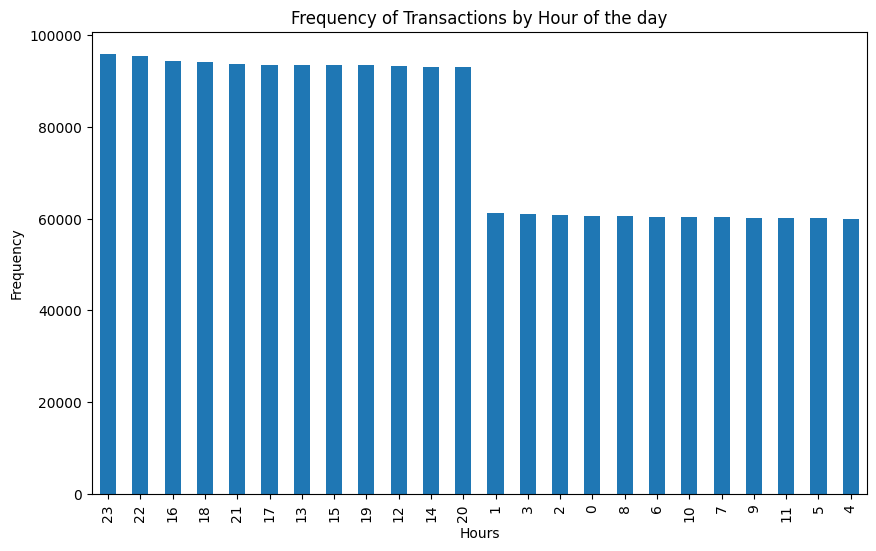

In [17]:
data['hour'].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Transactions by Hour of the day')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

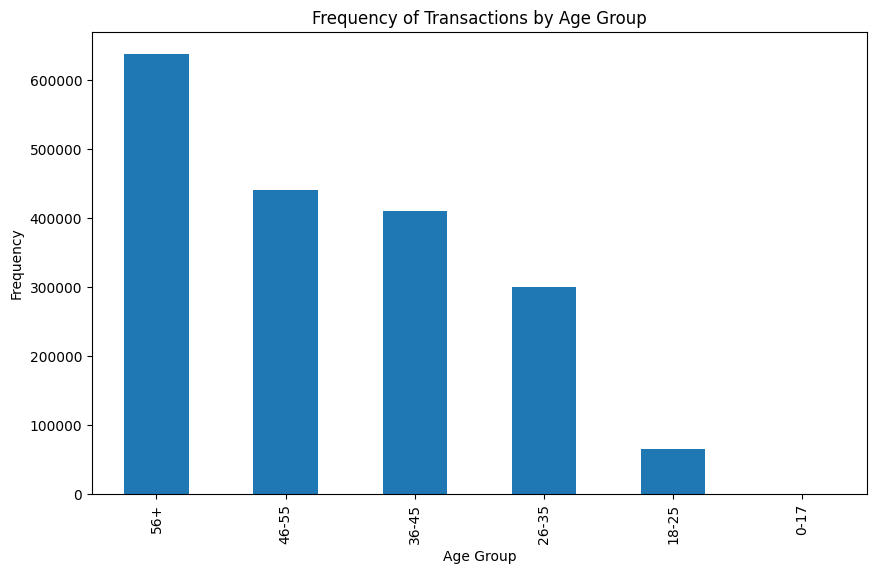

In [18]:
data['age_group'].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Transactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

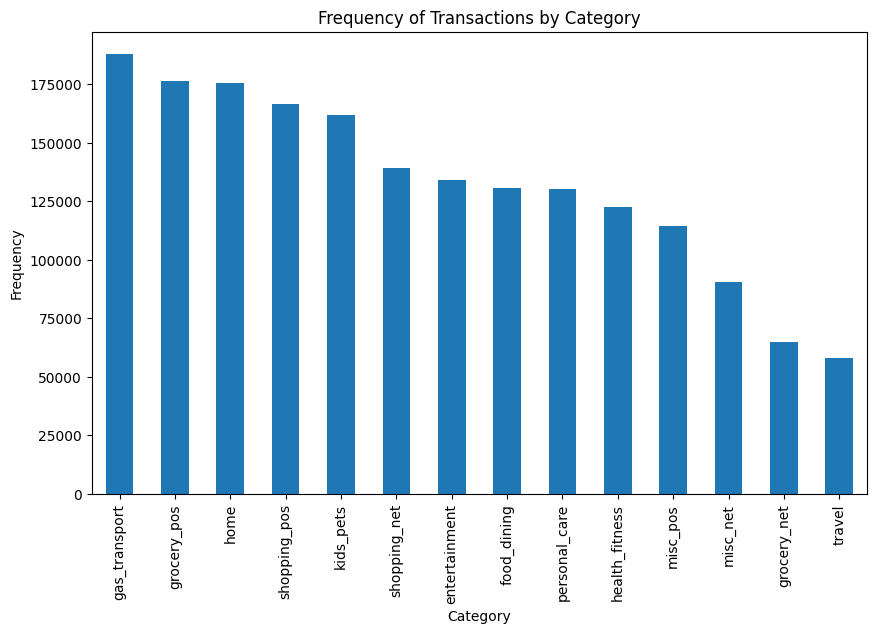

In [19]:
data['category'].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

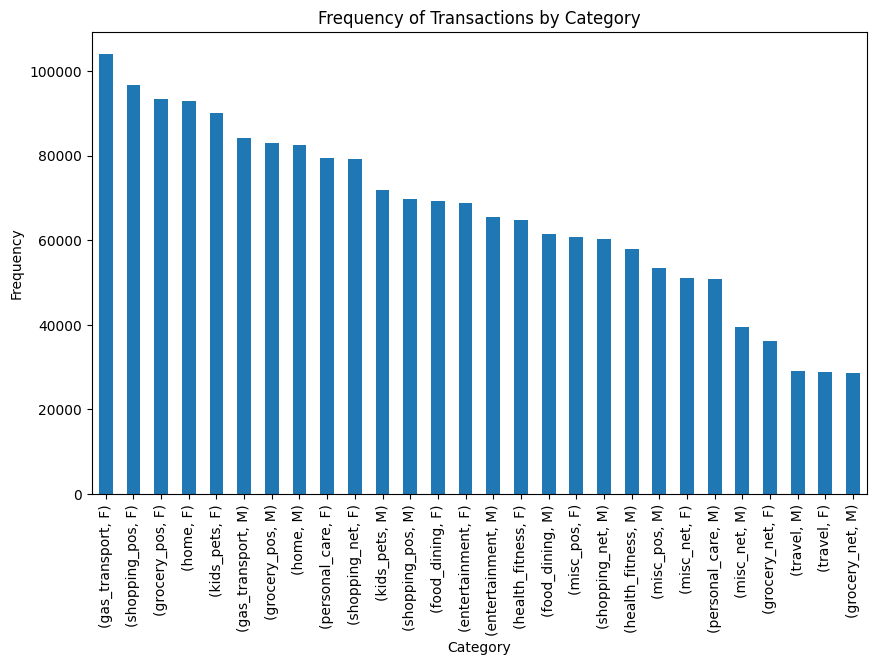

In [20]:
data[['category','gender']].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [21]:
# bar charts for categorical data
def pivotToBarChart(data, indexBy, aggregateBy, values, title, xlabel,
                    ylabel,aggfunc='count', anchor=(1.04, 1),
                    anchor_location='upper left', figsize=(10,4),
                    fill_value=0, stacked=False, show_proportions=False):
    pivot_df = data.pivot_table(index=indexBy, columns=aggregateBy, values=values, aggfunc= aggfunc, fill_value=0)
    row_pivot = pivot_df
    if show_proportions == True:
        pivot_df = pivot_df.div(pivot_df.sum(1).astype(float), axis=0)
    pivot_df.plot(kind='bar',figsize=(10,6), stacked=stacked)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=anchor, loc=anchor_location)
    plt.show()
    return row_pivot

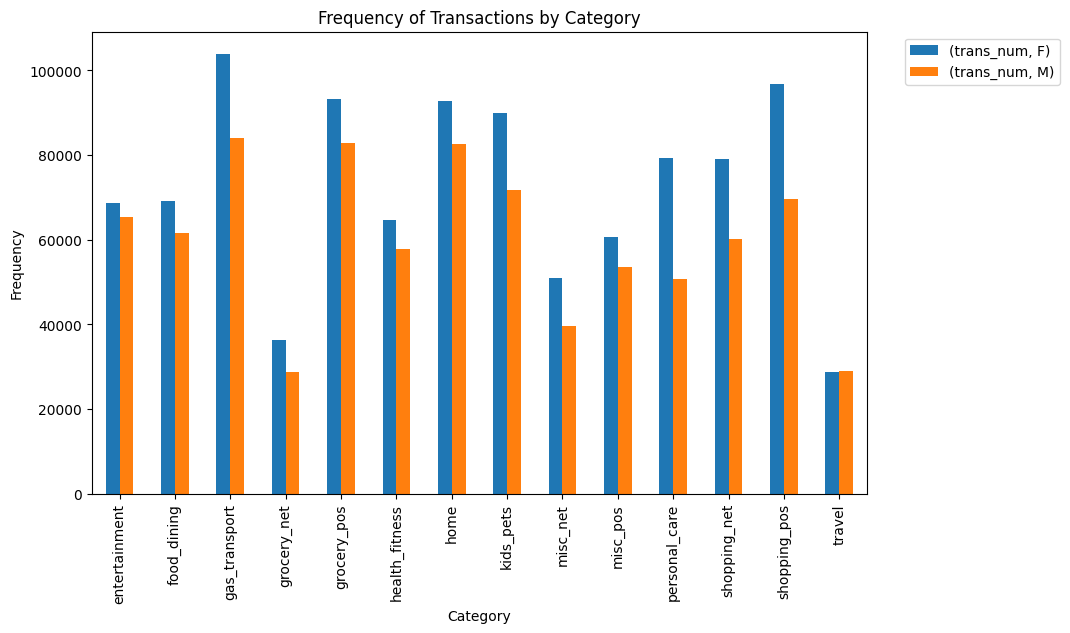

In [22]:
###############################################################
#       Relationship between gender, hypertension, and age    #
###############################################################
pivot_df = pivotToBarChart(data=data,indexBy=['category'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Category',
                           ylabel='Frequency',
                           title='Frequency of Transactions by Category')

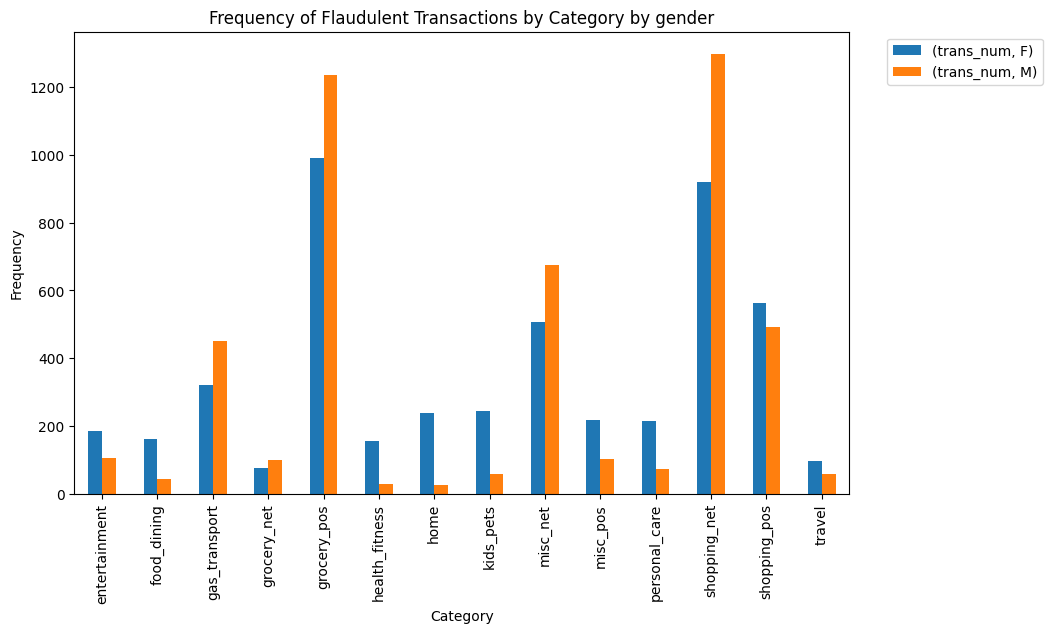

In [23]:
###############################################################
#       Relationship between gender, hypertension, and age    #
###############################################################
_data=data[data['is_fraud']==1]
pivot_df = pivotToBarChart(data=_data,indexBy=['category'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Category',
                           ylabel='Frequency',
                           title='Frequency of Flaudulent Transactions by Category by gender')

In [24]:
most_dangerous_cities = _data.groupby('city').size().reset_index(name='count').sort_values('count', ascending=False).head(20)
most_dangerous_cities['city']
dangerous_city_data = _data[_data['city'].isin(most_dangerous_cities['city'])]

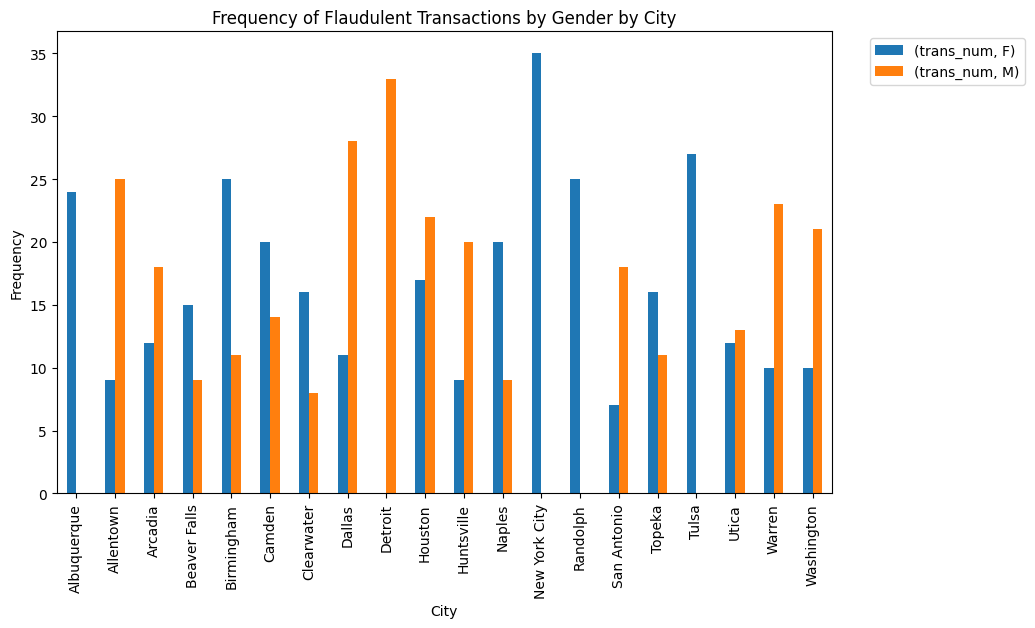

In [25]:
pivot_df = pivotToBarChart(data=dangerous_city_data,indexBy=['city'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='City',
                           ylabel='Frequency',
                           title='Frequency of Flaudulent Transactions by Gender by City')

<ipython-input-21-a2b46c4821fe>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = data.pivot_table(index=indexBy, columns=aggregateBy, values=values, aggfunc= aggfunc, fill_value=0)


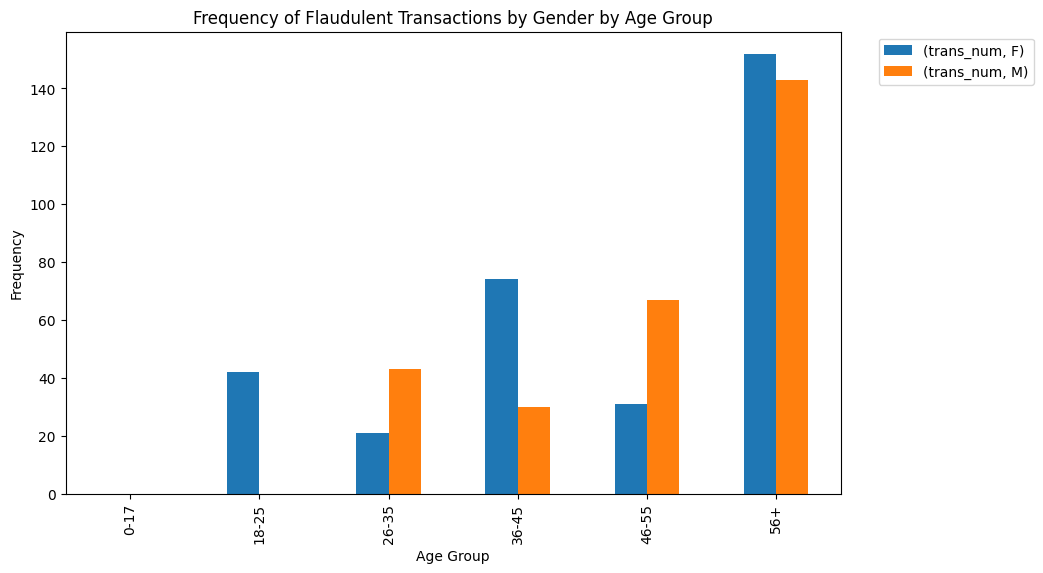

In [26]:
pivot_df = pivotToBarChart(data=dangerous_city_data,indexBy=['age_group'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Age Group',
                           ylabel='Frequency',
                           title='Frequency of Flaudulent Transactions by Gender by Age Group')

<ipython-input-21-a2b46c4821fe>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = data.pivot_table(index=indexBy, columns=aggregateBy, values=values, aggfunc= aggfunc, fill_value=0)


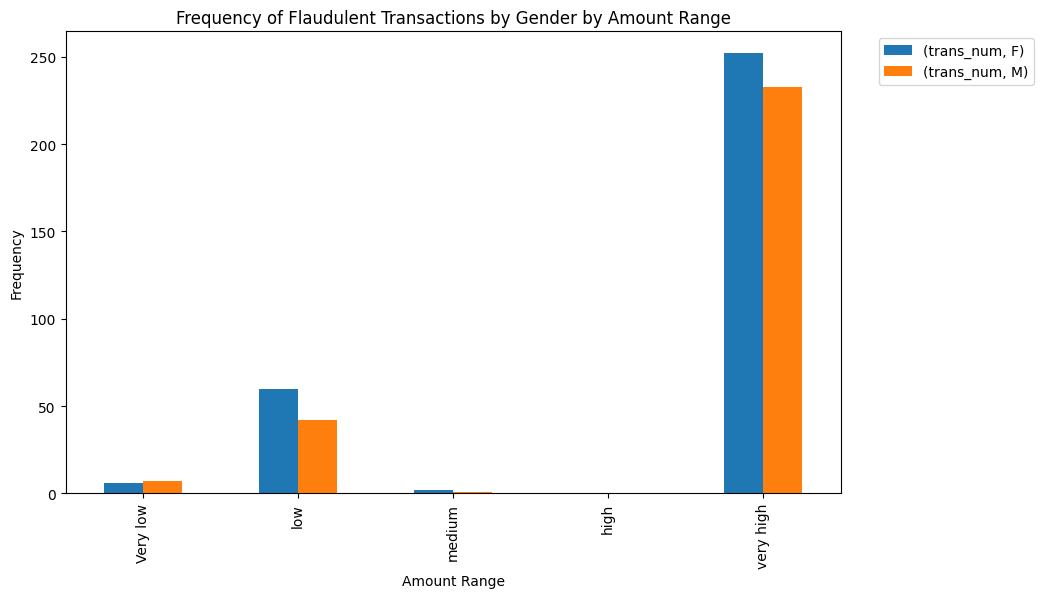

In [27]:
pivot_df = pivotToBarChart(data=dangerous_city_data,indexBy=['amount_range'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Amount Range',
                           ylabel='Frequency',
                           title='Frequency of Flaudulent Transactions by Gender by Amount Range')

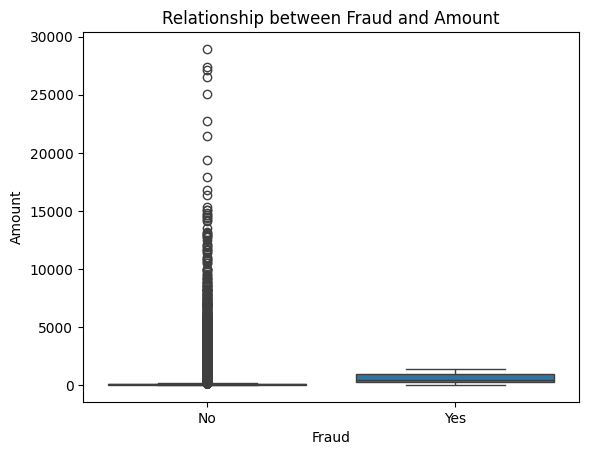

In [28]:
sns.boxplot(x='fraudulent', y='amt', data=data)
plt.title('Relationship between Fraud and Amount')
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.show()

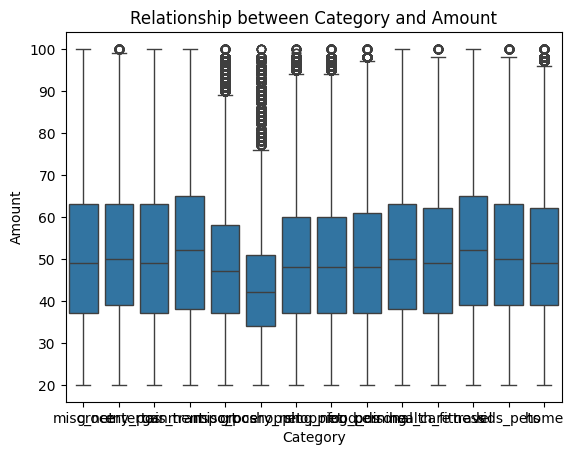

In [29]:
sns.boxplot(x='category', y='age', data=data)
plt.title('Relationship between Category and Amount')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

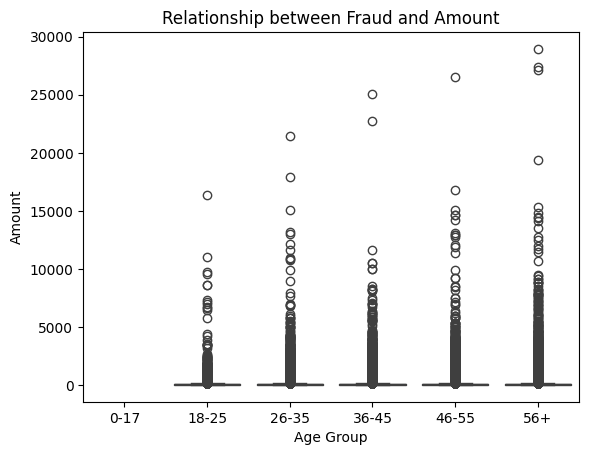

In [30]:
sns.boxplot(x='age_group', y='amt', data=data)
plt.title('Relationship between Fraud and Amount')
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.show()

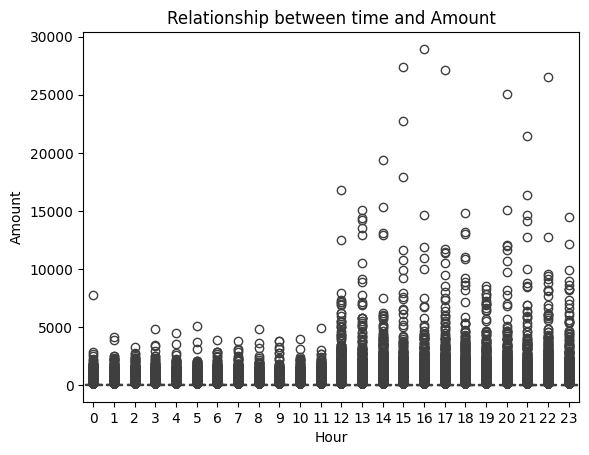

In [31]:
sns.boxplot(x='hour', y='amt', data=data)
plt.title('Relationship between time and Amount')
plt.xlabel('Hour')
plt.ylabel('Amount')
plt.show()

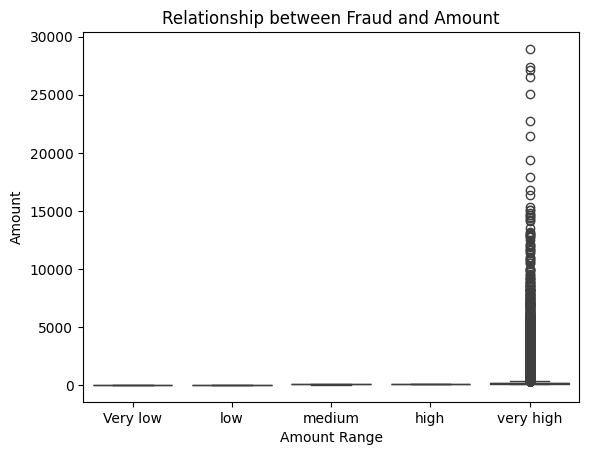

In [32]:
sns.boxplot(x='amount_range', y='amt', data=data)
plt.title('Relationship between Fraud and Amount')
plt.xlabel('Amount Range')
plt.ylabel('Amount')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


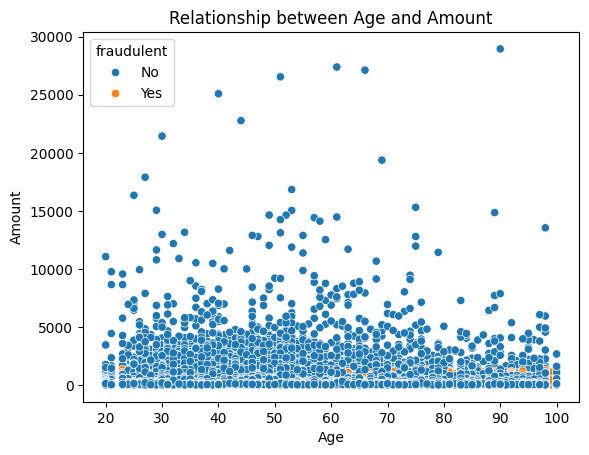

In [33]:
sns.scatterplot(x='age', y='amt', hue='fraudulent', data=data)
plt.title('Relationship between Age and Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

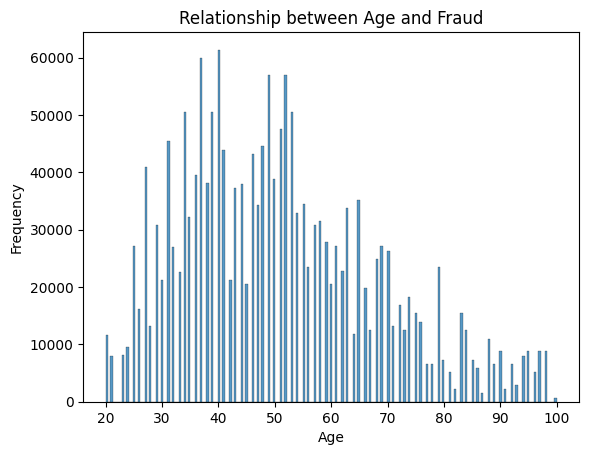

In [34]:
sns.histplot(data=data, x='age')
plt.title('Relationship between Age and Fraud')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

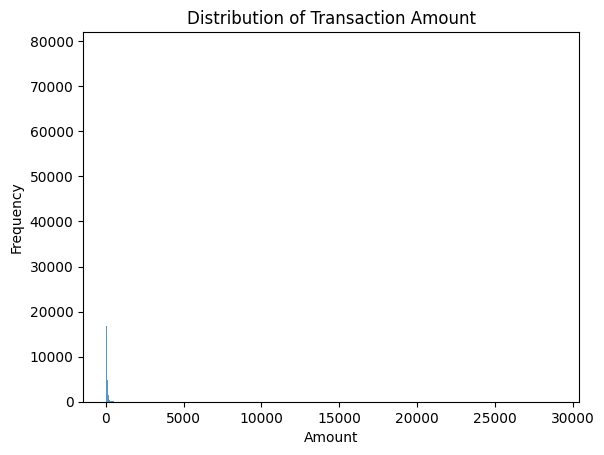

In [35]:
sns.histplot(data=data, x='amt')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

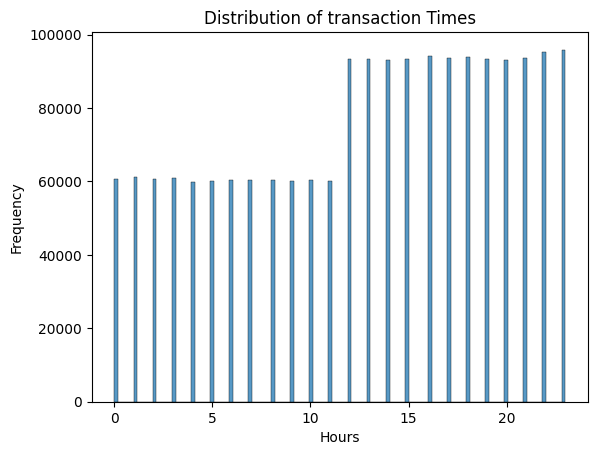

In [36]:
sns.histplot(data=data, x='hour')
plt.title('Distribution of transaction Times')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

**Feauture Selection**

In [37]:
fraudData = data[['amount_range','hour','age_group','category','gender','city','state','is_fraud']]
fraudData.head()

,amount_range,hour,age_group,category,gender,city,state,is_fraud
0,Very low,0,36-45,misc_net,F,Moravian Falls,NC,0
1,very high,0,46-55,grocery_pos,F,Orient,WA,0
2,very high,0,56+,entertainment,M,Malad City,ID,0
3,medium,0,56+,gas_transport,M,Boulder,MT,0
4,medium,0,36-45,misc_pos,M,Doe Hill,VA,0


**ENCODING AND CLASS BALANCING**

In [38]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

'''
Encoding categorical data using LabelEncoder
'''
def encodeCategoricalData(columns, data):

    for column in columns:
      LE = LabelEncoder()
      data[column] = LE.fit_transform(data[column])
    return data
'''
Creating a model for fraud detection
'''
def createModelData(data, response_column):
    #create dependent/response series
    y = data[response_column]
    #create predictors
    X =  data.drop(columns=[response_column])
    return X,y
'''
Balancing the data using SMOTE
'''
def balancedData(data, response_column):
    X, y = createModelData(data, response_column)

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_res, y_res = smote.fit_resample(X, y)

    # Return the resampled data as a DataFrame (optional but helpful)
    X_resampled = pd.DataFrame(X_res, columns=X.columns)
    y_resampled = pd.Series(y_res, name=response_column)

    return X_resampled, y_resampled

In [39]:
fraudData_encoded = encodeCategoricalData(['amount_range','age_group','category','gender','city','state'], fraudData)

<ipython-input-38-4ebff60914b2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = LE.fit_transform(data[column])
<ipython-input-38-4ebff60914b2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = LE.fit_transform(data[column])
<ipython-input-38-4ebff60914b2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [40]:
fraudData_encoded.head()

,amount_range,hour,age_group,category,gender,city,state,is_fraud
0,0,0,2,8,0,532,27,0
1,4,0,3,4,0,619,47,0
2,4,0,4,0,1,474,13,0
3,3,0,4,2,1,84,26,0
4,3,0,2,9,1,217,45,0


In [41]:
from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler

columns = fraudData_encoded.columns.tolist()
target = 'is_fraud'
scaled_encoded_fraud_data = pd.DataFrame(RobustScaler().fit_transform(fraudData_encoded), columns=columns)
predictors = columns.remove(target)
scaled_encoded_fraud_data.head()

,amount_range,hour,age_group,category,gender,city,state,is_fraud
0,-1.0,-1.166667,-0.5,0.285714,0.0,0.192140,0.000000,0.0
1,1.0,-1.166667,0.0,-0.285714,0.0,0.382096,0.869565,0.0
2,1.0,-1.166667,0.5,-0.857143,1.0,0.065502,-0.608696,0.0
3,0.5,-1.166667,0.5,-0.571429,1.0,-0.786026,-0.043478,0.0
4,0.5,-1.166667,-0.5,0.428571,1.0,-0.495633,0.782609,0.0


In [42]:
X, y = balancedData(scaled_encoded_fraud_data, target)

In [43]:
X.shape

(3685486, 7)

In [44]:
final_data = pd.concat([X, y], axis=1)

**Data Splits**

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y, random_state=123)

**MODELLING**

In [46]:
def plotConfusionMatrix(model, X, y):
  from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError

  classes = ['No','Yes']
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y, random_state=123)
  # set models
  cm = ConfusionMatrix(  model, classes=classes, label_encoder={0: 'Not fraud', 1: 'Fraud'} )
  cr = ClassificationReport(model, classes=classes, support=True)
  roc = ROCAUC(model, classes=classes, binary=True)
  cpe = ClassPredictionError(model, classes=classes)
  #plot graphs
  plotVisualiser(cm,X_train, y_train, X_test, y_test)
  plotVisualiser(cr,X_train, y_train, X_test, y_test)
  plotVisualiser(roc,X_train, y_train, X_test, y_test)
  plotVisualiser(cpe,X_train, y_train, X_test, y_test)


def plotVisualiser(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  model.score(X_test, y_test)
  model.show()

*Random Forest Classifier*

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split':[2,3,5,10,15,19,20],
    "ccp_alpha":[0.001,0.002,0.025]
}
cv = StratifiedKFold(5)
scoring = 'f1_weighted'

In [ ]:
model = RandomForestClassifier(random_state=123)
grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=cv, scoring=scoring, verbose=1, n_iter=40, random_state=42, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation {scoring}: {grid_search.best_score_:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=40. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
plotConfusionMatrix(model,X,y)

XGB CLASSIFIER

In [50]:
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
model = XGBClassifier(device='cuda', random_state=123)

grid = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring=scoring, verbose=1,n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:31:28] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:31:28] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


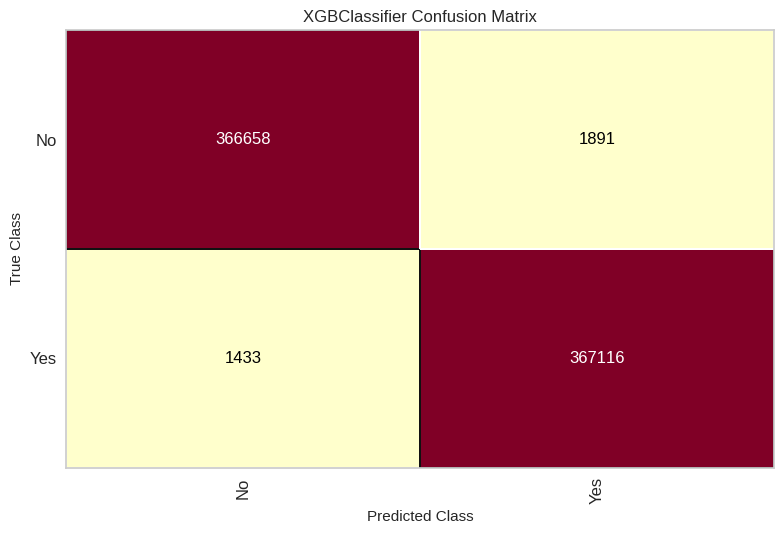

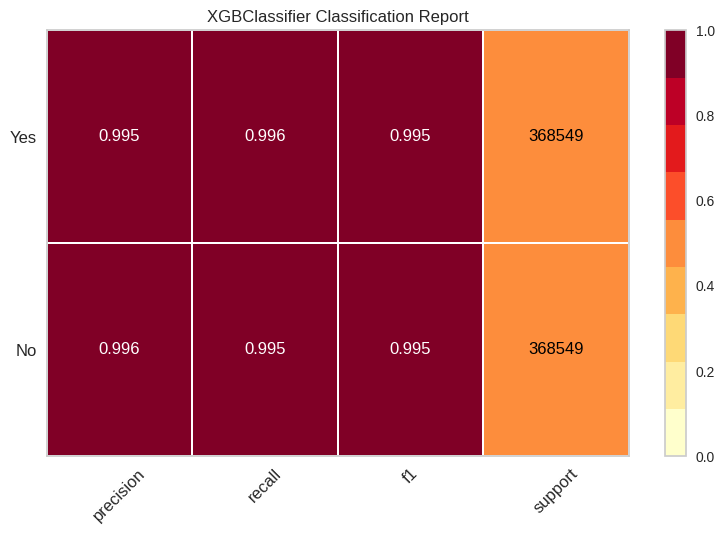

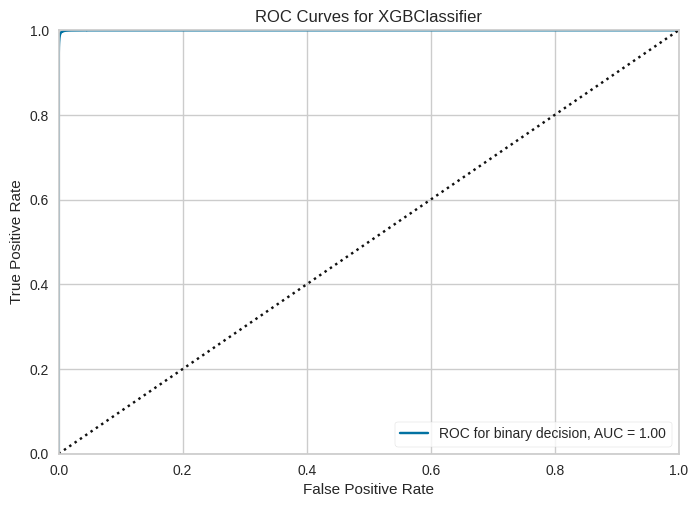

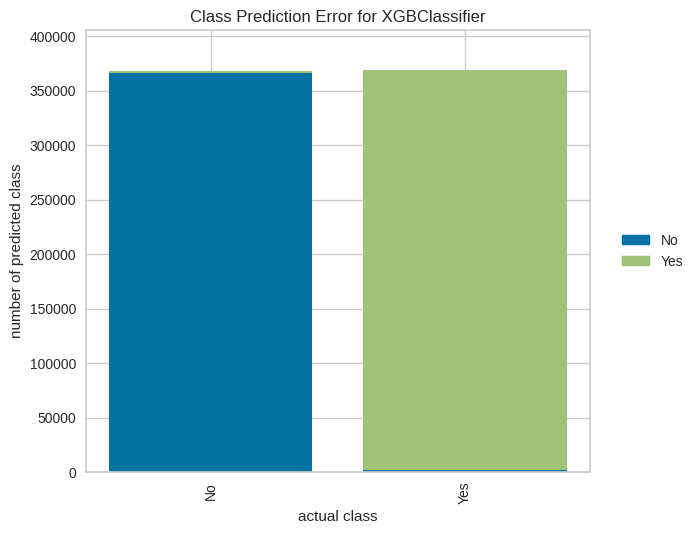

In [51]:
model = XGBClassifier(device='cuda', random_state=123, n_estimators=300, max_depth=20)
plotConfusionMatrix(model,X,y)